<center> 

# CI and Bootstrapping Part II

## Dr. Lange- University of Chicago
## Data 11800 - Winter 2024 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UChicago_DSI.png" alt="UC-DSI" width="500" height="600">
    
</center>

## Some Questions

Consider the following: 

A 95% confidence interval for the average age of mothers at birth is [26.5,27.75].

<code style="background:Thistle;color:black"> Q: About 95% of mothers in the population are between 26.5
and 27.75 years old. True or False?</code>

Answer? Don't reveal the answer without thinking through the question!

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
A: False. We are estimating that their average age is in the
interval.
</p>
</details>

<code style="background:Thistle;color:black"> Q: There is a 95% probability that the average age of mothers
in the population is in the range 26.5 to 27.75 years. True or False? </code>


<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
A:False. The average age of mothers in the population is
unknown but constant. It is not random.
</p>
</details>

### Last time
#### How to calculate confidence intervals (CI)

To calculate confidence intervals we need the sampling
distribution of $\hat{\theta}$ or $\hat{\theta} −\theta$


 - Classical statistical methods use mathematics to solve this....we use simulation:
 
 
 - In Option 1, (know distribution $\hat{\theta} −\theta$):  CI is $[\hat{\theta} −U_1, \hat{\theta} −L_1]$ ---> Basic Bootstrap

        
 - In Option  2, (know distribution $\hat{\theta}$): CI is $[\hat{\theta} −W , \hat{\theta} + W ] \approx [L_0, U_0]$ ---> Percentile Bootstrap
 

<center>
<img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/bootstrap.png" width="800" style="display: inline-block; margin: 0" />
</center>

### Another example!!

## On the bootstrap confidence intervals for the mean: 

We will illustrate this with salary data from City of Chicago:
https://www.cityofchicago.org/city/en/depts/dhr/dataset/current_employeenamessalariesandpositiontitles.html

After we downloaded the data, we edited by removing part-time and hourly employees.

Compute the percentile bootstrap for a 99% confidence interval for the mean annual salary.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# read the data 
chicago_df = pd.read_csv('https://raw.githubusercontent.com/SusannaLange/Data_118_Images/main/Data/ChicagoSalary.csv')

# assume only one sample (n=300) from the population is available
our_sample_df = chicago_df.sample(300, replace=False)
our_sample_df.head(5)

,Job.Titles,Department,Annual.Salary
19205,DEPUTY COMMISSIONER,STREETS & SAN,132780.0
11838,LIEUTENANT,FIRE,127410.0
12669,POLICE OFFICER,POLICE,109236.0
9763,POLICE OFFICER,POLICE,106170.0
15570,POLICE OFFICER,POLICE,102372.0


We need the observed test statistic

In [3]:

est_mean = np.mean(our_sample_df['Annual.Salary'])
est_mean

98671.84920000001

One bootstrap sample

In [4]:
# a bootstrap sample
resample_1 = our_sample_df.sample(300,replace=True)
resample_1 

,Job.Titles,Department,Annual.Salary
9340,LIEUTENANT-EMT,FIRE,135144.0
11082,SERGEANT,POLICE,126504.0
18013,POLICE OFFICER,POLICE,106170.0
22304,FIREFIGHTER-EMT,FIRE,98904.0
18013,POLICE OFFICER,POLICE,106170.0
...,...,...,...
18009,DETENTION AIDE,POLICE,71436.0
6288,SERGEANT,POLICE,126504.0
13606,FIREFIGHTER (PER ARBITRATORS AWARD)-EMT,FIRE,114654.0
13483,COMMUNICABLE DISEASE CONTROL INVESTIGATOR II,HEALTH,53952.0


##### Bootstrap Sample vs Original Sample

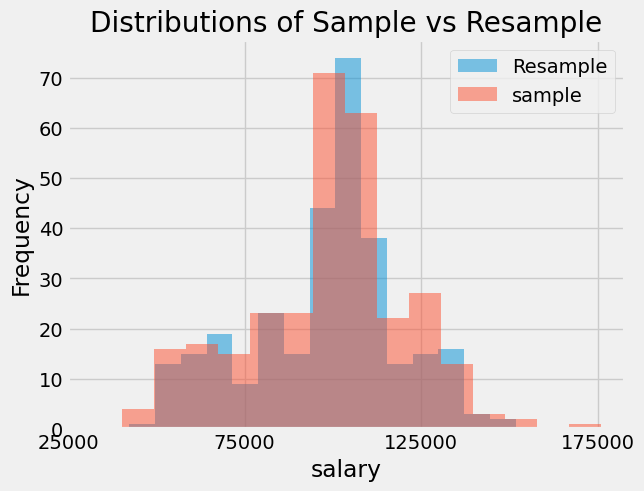

In [5]:
#overlapping histograms

plt.hist(resample_1['Annual.Salary'], bins=15, alpha=0.5, label='Resample') ## alpha controls opacity
plt.hist(our_sample_df['Annual.Salary'], bins=15, alpha=0.5, label='sample')
plt.legend(loc='upper right')
plt.title('Distributions of Sample vs Resample')
plt.xlabel('salary')
plt.xticks(np.arange(25000, 200000, 50000))
plt.ylabel('Frequency')
plt.show()

We calculate the resampled mean

In [6]:
resampled_mean_1 = np.mean(resample_1['Annual.Salary'])

resampled_mean_1

98009.24

In [7]:
resample_2 = our_sample_df.sample(300,replace=True)
resampled_mean_2 = np.mean(resample_2['Annual.Salary'])
resampled_mean_2

98506.72

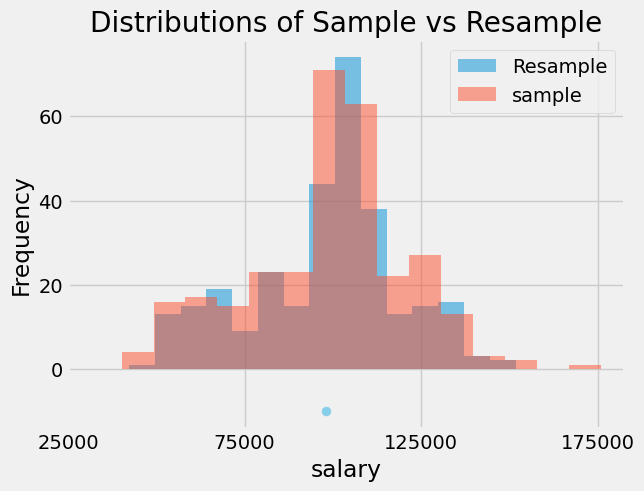

In [8]:
plt.hist(resample_1['Annual.Salary'], bins=15, alpha=0.5, label='Resample') ## alpha controls opacity
plt.hist(our_sample_df['Annual.Salary'], bins=15, alpha=0.5, label='sample')
plt.legend(loc='upper right')
plt.title('Distributions of Sample vs Resample')
plt.xlabel('salary')
plt.scatter(resampled_mean_1, -10, color='skyblue', s=40);
plt.xticks(np.arange(25000, 200000, 50000))
plt.ylabel('Frequency')
plt.show()

Resample our sample a set number of times:

In [9]:
def bootstrap_mean(original_sample, label, replications):
    """Simulate sample mean:
    original_sample: df containing the original data
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample means
    """
    means = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample(len(original_sample),replace=True)
        resampled_mean = np.mean(bootstrap_sample[label])
        means = np.append(means, resampled_mean)
        
    return means

In [10]:
bstrap_means = bootstrap_mean(our_sample_df, 'Annual.Salary', 2000)

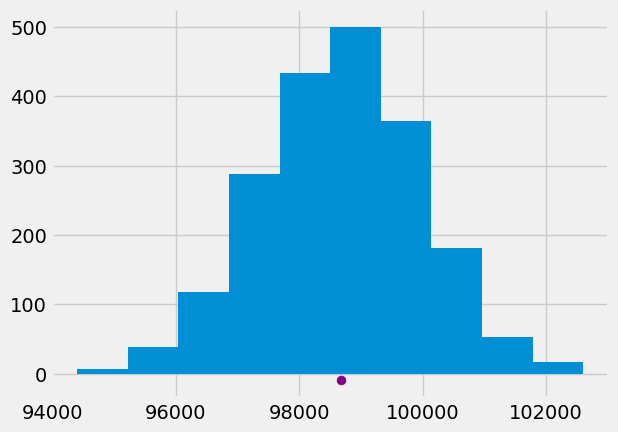

In [11]:
plt.hist(bstrap_means)
plt.scatter(est_mean, -10, color='purple', s=40);

We have done the bootstrap resample. Now we can create our confidence interval. We want 99% CI.

What percentiles do we want for a 99% CI?

In [12]:
left = np.percentile(bstrap_means, 0.5)
left

95373.02659400001

In [13]:
right = np.percentile(bstrap_means,99.5)
right

101967.819768

In [14]:
print('CI: [', str(left), ',', str(right), "]")

CI: [ 95373.02659400001 , 101967.819768 ]


This gives a 99% confidence interval using a **percentile bootstrap.** (note that you might get a slightly different CI every time you run the procedure).

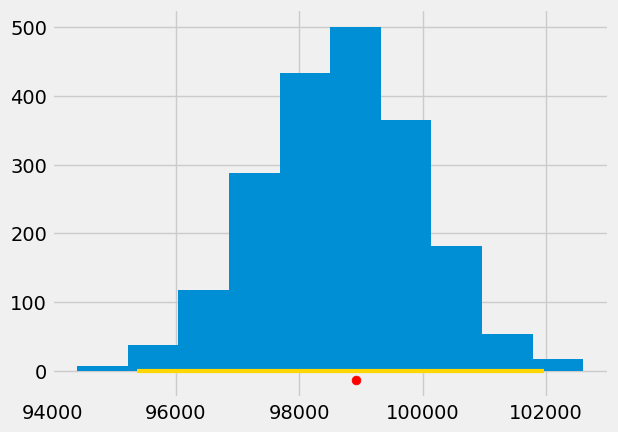

In [15]:
pop_mean = np.mean(chicago_df['Annual.Salary'])
plt.hist(bstrap_means)
plt.scatter(pop_mean, -14, color='red', s=40)
plt.plot([left, right], [0, 0], color='gold', lw=3, zorder=1);

### Basic Bootstrap for this example

In [16]:
#calculate percentiles
L1 = np.percentile(bstrap_means - est_mean, 0.5)
U1 = np.percentile(bstrap_means - est_mean, 99.5)

In [17]:
#make CI
[est_mean-U1, est_mean-L1]

[95375.87863200002, 101970.67180600001]

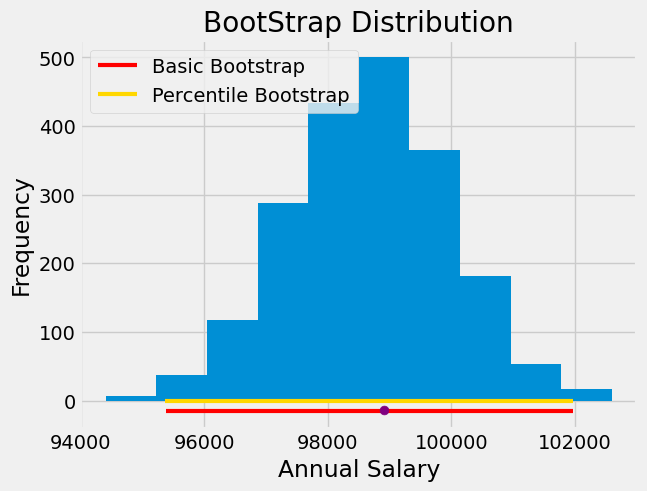

In [18]:
plt.hist(bstrap_means)

plt.plot([est_mean-U1, est_mean-L1], [-15, -15], color='red', lw=3, zorder=1,label="Basic Bootstrap");
plt.plot([np.percentile(bstrap_means, 0.5), np.percentile(bstrap_means,99.5)], [0, 0], color='gold', lw=3, zorder=1, label = 'Percentile Bootstrap');

plt.scatter(pop_mean, -14, color='purple', s=40, zorder = 2)
plt.title('BootStrap Distribution')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')
plt.legend(loc = 'upper left')
plt.show()

### Why are there two methods?

Last time we said we can compute CI by:

 - basic bootstrap:  $\hat{\theta} - \theta$

    
 - percentile bootstrap:   $\hat{\theta}$

We get confidence intervals in both cases....what's the difference?!

Above, we computed the percentile and basic bootstrap for a 99% confidence interval for the mean annual salary of **City of Chicago employees**

### In general...

Percentile Bootstrap is easier to compute $[L_0, U_0]$

   - Assumes symmetric around $\theta$
 
    
Basic Bootstrap 

   - Works better in general
    
   - a little more complicated to compute: $[\hat{\theta} - U_1, \hat{\theta}-L_1]$


### To see this, consider when our sample is biased !

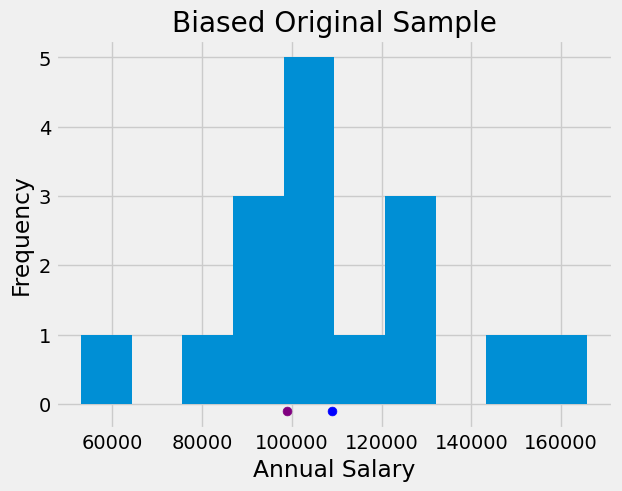

In [19]:
np.random.seed(13)
our_sample_df2 = chicago_df.sample(16, replace=False)
sample_mean = np.mean(our_sample_df2['Annual.Salary'])

plt.hist(our_sample_df2['Annual.Salary'])

plt.scatter(pop_mean, -.1, color='purple', s=40)
plt.scatter(sample_mean, -.1, color='blue', s=40)
plt.title('Biased Original Sample')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')
plt.show()

In [20]:
pop_mean - sample_mean

-10101.174628140696

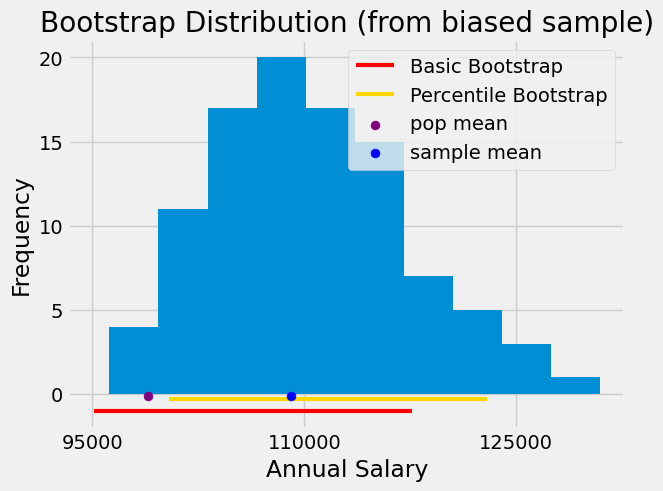

In [21]:
#you can ignore this code for now
#there is a lot going on here
#but really we are just calculating the two different confidence intervals and putting them on the graph
np.random.seed(0)
bstrap2 = bootstrap_mean(our_sample_df2, 'Annual.Salary', 100)
L_0_sample_bias = np.percentile(bstrap2-sample_mean,5)
U_0_sample_bias = np.percentile(bstrap2-sample_mean,95)
#bootstrap distribution
plt.hist(bstrap2)
#both confidence intervals
plt.plot([sample_mean-U_0_sample_bias,sample_mean-L_0_sample_bias], [-1, -1], color='red', lw=3, zorder=1, label = "Basic Bootstrap");
plt.plot([np.percentile(bstrap2, 5), np.percentile(bstrap2,95)], [-.3, -.3], color='gold', lw=3, zorder=1, label = "Percentile Bootstrap");

#plotting the means
plt.scatter(pop_mean, -.1, color='purple', s=40, label = 'pop mean')
plt.scatter(sample_mean, -.1, color='blue', s=40, label = 'sample mean')
#extras
plt.title('Bootstrap Distribution (from biased sample)')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')
plt.legend()
plt.xticks(np.arange(95000,130000,15000))
plt.show()

## We could also have a biased bootstrap distribution!

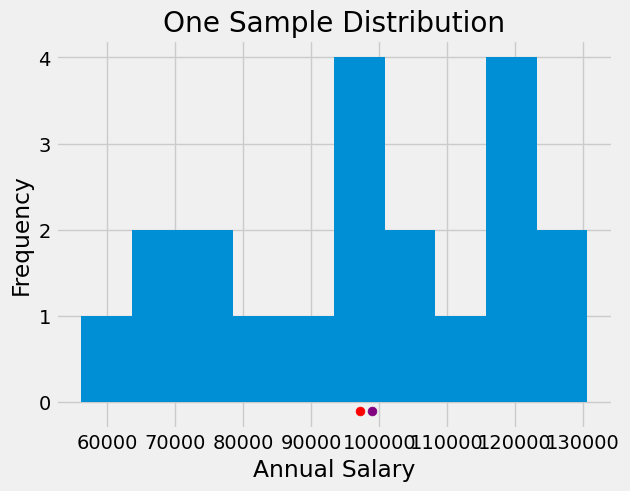

In [22]:
np.random.seed(6)
our_sample_df = chicago_df.sample(20)
plt.hist(our_sample_df['Annual.Salary'])
plt.scatter(pop_mean, -.1, color='purple', s=40)
plt.scatter(np.mean(our_sample_df['Annual.Salary']), -.1, color='red', s=40)
plt.title('One Sample Distribution')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')
plt.show()

In [23]:
np.mean(our_sample_df['Annual.Salary']) - pop_mean

-1804.2233718593052

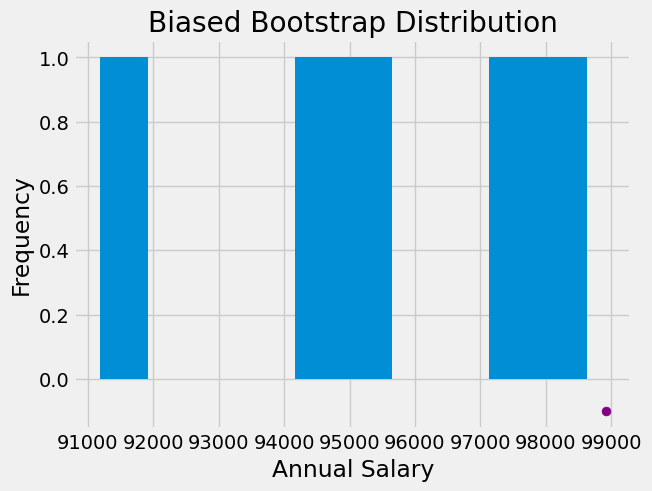

In [24]:
np.random.seed(6)
bstrap_means_bias = bootstrap_mean(our_sample_df, 'Annual.Salary', 5)
plt.hist(bstrap_means_bias)
plt.scatter(pop_mean, -.1, color='purple', s=40)
plt.title('Biased Bootstrap Distribution')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')
plt.show()

Here we get the following for the bootstrap CI:

In [25]:
#percentile
[np.percentile(bstrap_means_bias, 0.5), np.percentile(bstrap_means_bias,99.5)]

[91241.454, 98607.57]

In [26]:
##basic bootstrap
L_0_bias = np.percentile(bstrap_means_bias-est_mean,2.5)
U_0_bias = np.percentile(bstrap_means_bias-est_mean,97.5)
[np.mean(bstrap_means_bias)-U_0_bias,np.mean(bstrap_means_bias)-L_0_bias]

[95565.3192, 102613.0992]

### This corresponds to this visualization!

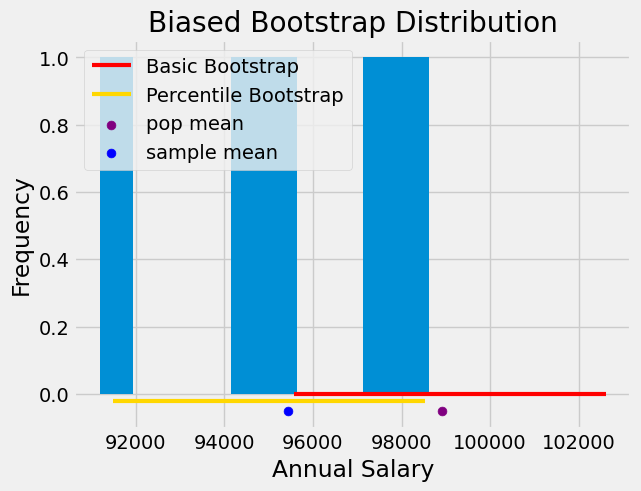

In [27]:
plt.hist(bstrap_means_bias)
plt.plot([np.mean(bstrap_means_bias)-U_0_bias,np.mean(bstrap_means_bias)-L_0_bias], [0, 0], color='red', lw=3, zorder=1, label = "Basic Bootstrap");
plt.plot([np.percentile(bstrap_means_bias, 2.5), np.percentile(bstrap_means_bias,97.5)], [-.02, -.02], color='gold', lw=3, zorder=1, label = "Percentile Bootstrap");
plt.scatter(pop_mean, -.05, color='purple', s=40, label = 'pop mean')
plt.scatter(np.mean(bstrap_means_bias), -.05, color='blue', s=40, label = 'sample mean')
plt.title('Biased Bootstrap Distribution')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')
plt.legend(loc = 'upper left')
plt.show()

Hence the Basic Bootstrap method of computing Confidence Intervals is generally better than the percentile method.

If we want to be more certain that we capture the
population parameter (i.e., increase our confidence level)
should we use a wider interval or a smaller interval?



Are there any drawbacks to using a wider interval?

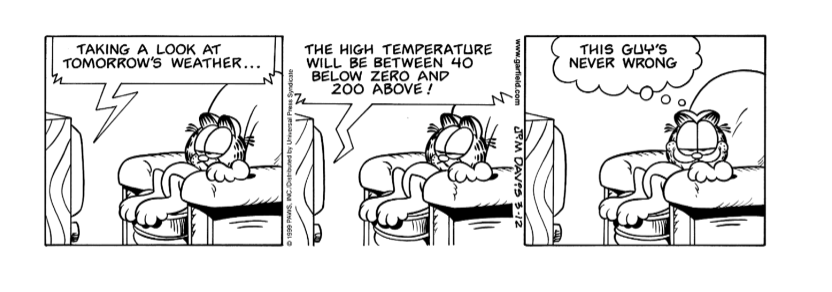

## If time...

Up above we created one bootstrap distribution and found CI's (both percentile and basic)

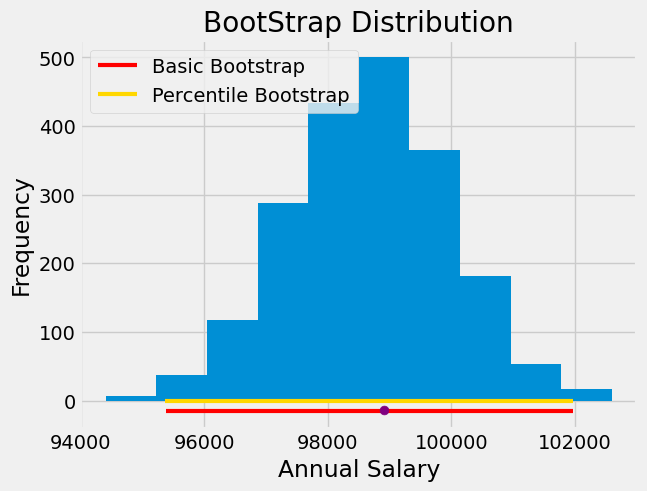

In [28]:
plt.hist(bstrap_means)

plt.plot([est_mean-U1, est_mean-L1], [-15, -15], color='red', lw=3, zorder=1,label="Basic Bootstrap");
plt.plot([np.percentile(bstrap_means, 0.5), np.percentile(bstrap_means,99.5)], [0, 0], color='gold', lw=3, zorder=1, label = 'Percentile Bootstrap');

plt.scatter(pop_mean, -14, color='purple', s=40, zorder = 2)
plt.title('BootStrap Distribution')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')
plt.legend(loc = 'upper left')
plt.show()

## This is one Bootstrap Distribution

We see in this case it does contain the population mean!

Let's repeat this process 100 times.

We want to see how often the true population parameter is in the confidence interval. For a 95% CI, does our CI actually contain the true pop parameter 95% of the time?

To do this, fill in the ???? below.
We want a 95% percentile bootstrap CI. 

In [29]:
# Iterate the process 100 times, 
# Sampling 50 times from the chicago salary data
# Include a counter that determines if the CI contains the true mean


ci_level = ???
ci_hit_count = ????
boot_resample = 100
true_mean = np.mean(chicago_df['Annual.Salary'])
for k in np.arange(0,??):
    sample = chicago_df.sample(??, replace=False)        
    boot_samp = bootstrap_mean(sample, 'Annual.Salary', boot_resample)
          
    L0 = np.percentile(???, ci_level/2)
    U0 = np.percentile(???, 100-ci_level/2)
    
    #check if percentile bootstrap CI contains the true mean ??
    if ?? < ??? < ??:
        ?????
        
print(ci_hit_count/??)

SyntaxError: invalid syntax (341534084.py, line 6)